In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Load the data `colvar.data` resulting from the 100 ns molecular dynamics simulation of alanine dipeptide.

In [2]:
x = np.loadtxt('colvar.data')

We have a trajectory of shape (100000, 3), where the first dimension is the number of frames (or time) and the second is the number of recorded variables (time $t$, $\Phi$, $\Psi$).

In [3]:
x

array([[ 0.000000e+00,  1.158887e+00, -6.249300e-02],
       [ 1.000000e+00,  1.111219e+00, -6.036960e-01],
       [ 2.000000e+00,  7.280720e-01, -1.035362e+00],
       ...,
       [ 9.999800e+04, -1.221497e+00,  1.162527e+00],
       [ 9.999900e+04, -1.327862e+00,  1.156643e+00],
       [ 1.000000e+05, -1.408206e+00,  1.863968e+00]])

Check the time evolution of the $\Phi$ dihedral angle.

(0.0, 100.0)

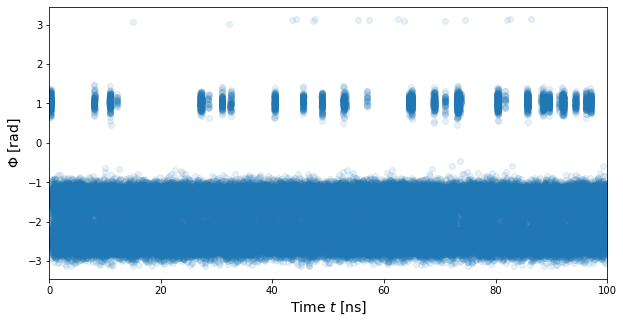

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(x[:,0] / 1000.0, x[:,1], alpha=0.1)
ax.set_xlabel('Time $t$ [ns]', size=14)
ax.set_ylabel('$\Phi$ [rad]', size=14)
ax.set_xlim([0, 100])

Now, check the $\Psi$ dihedral angle.

(0.0, 100.0)

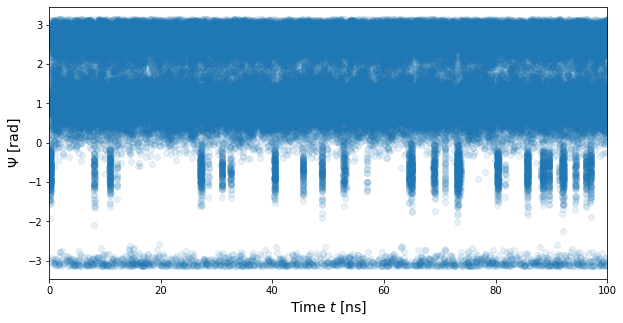

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(x[:,0] / 1000.0, x[:,2], alpha=0.1)
ax.set_xlabel('Time $t$ [ns]', size=14)
ax.set_ylabel('$\Psi$ [rad]', size=14)
ax.set_xlim([0, 100])

And now both dihedral angles.

(-3.141592653589793, 3.141592653589793)

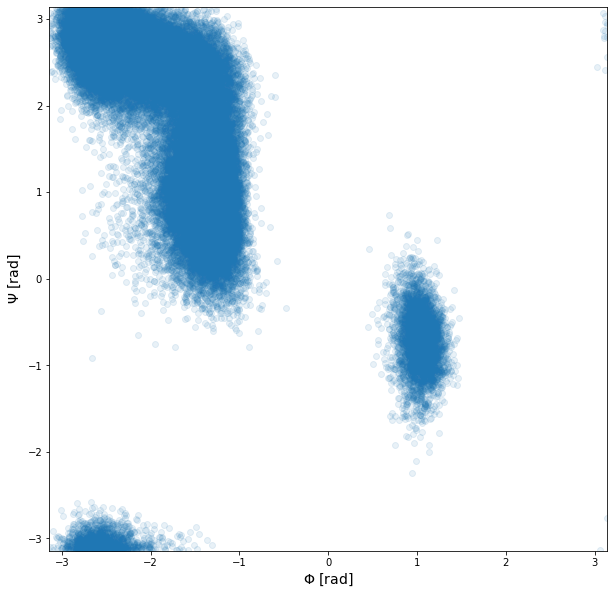

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x[:,1], x[:,2], alpha=0.1)
ax.set_xlabel('$\Phi$ [rad]', size=14)
ax.set_ylabel('$\Psi$ [rad]', size=14)
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([-np.pi, np.pi])

Let's build a histogram $\Phi$ collective variable.

(-3.141592653589793, 3.141592653589793)

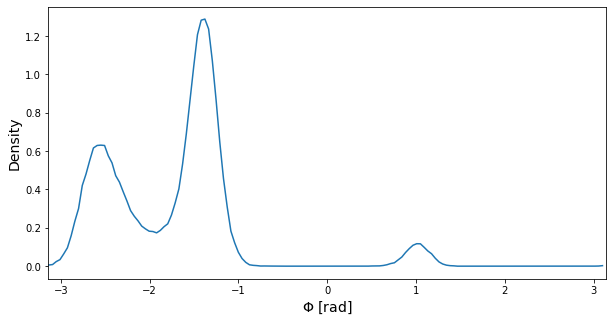

In [37]:
h, bins = np.histogram(x[:,1], bins=150, density=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bins[:-1], h)
ax.set_xlabel('$\Phi$ [rad]', size=14)
ax.set_ylabel('Density', size=14)
ax.set_xlim([-np.pi, np.pi])

And convert it to the free energy along $\Phi$.

<ipython-input-38-c74cd6996c68>:4: RuntimeWarning: divide by zero encountered in log
  f = -beta * np.log(h)


(-3.141592653589793, 3.141592653589793)

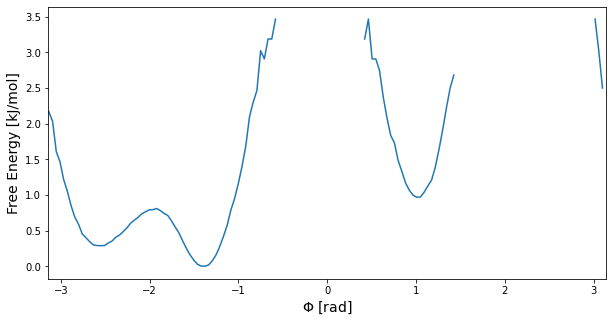

In [38]:
h, bins = np.histogram(x[:,1], bins=150, density=True)
kt = 2.479
beta = 1.0 / kt
f = -beta * np.log(h)
f -= f.min()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bins[:-1], f)
ax.set_xlabel('$\Phi$ [rad]', size=14)
ax.set_ylabel('Free Energy [kJ/mol]', size=14)
ax.set_xlim([-np.pi, np.pi])

Now repeat the calculations for the $\Psi$ dihedral angle.

(-3.141592653589793, 3.141592653589793)

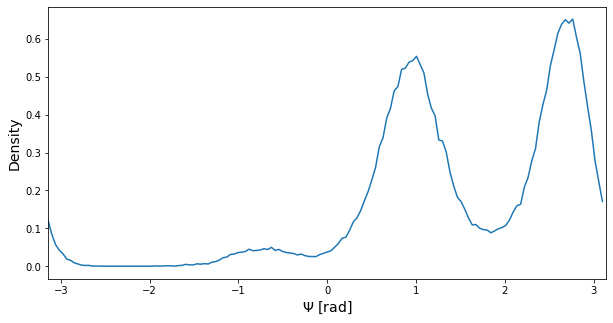

In [39]:
h, bins = np.histogram(x[:,2], bins=150, density=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bins[:-1], h)
ax.set_xlabel('$\Psi$ [rad]', size=14)
ax.set_ylabel('Density', size=14)
ax.set_xlim([-np.pi, np.pi])

<ipython-input-40-6e111b07f616>:4: RuntimeWarning: divide by zero encountered in log
  f = -beta * np.log(h)


(-3.141592653589793, 3.141592653589793)

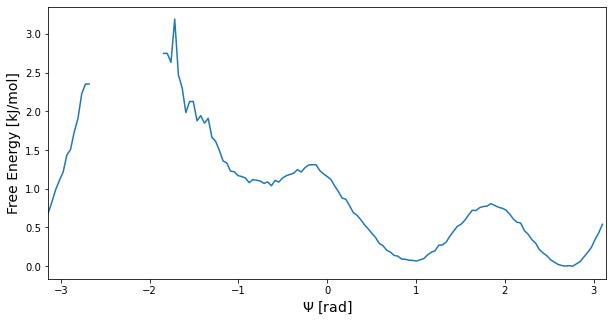

In [40]:
h, bins = np.histogram(x[:,2], bins=150, density=True)
kt = 2.479
beta = 1.0 / kt
f = -beta * np.log(h)
f -= f.min()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bins[:-1], f)
ax.set_xlabel('$\Psi$ [rad]', size=14)
ax.set_ylabel('Free Energy [kJ/mol]', size=14)
ax.set_xlim([-np.pi, np.pi])

And now let's do it in the ($\Phi$, $\Psi$) space.

Text(0, 0.5, '$\\Psi$ [rad]')

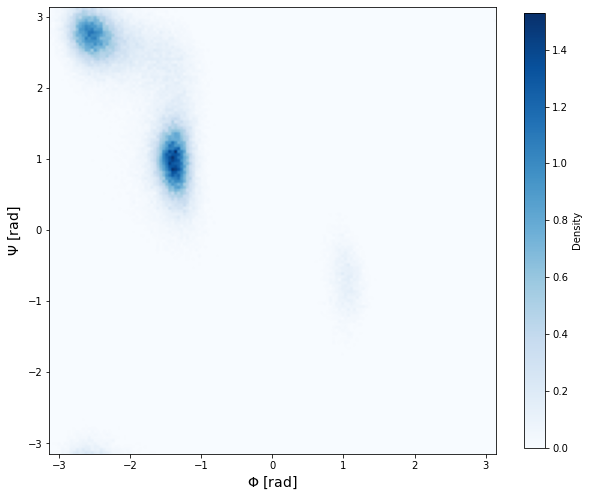

In [44]:
h, bins_x, bins_y = np.histogram2d(x[:,1], x[:,2], bins=150, density=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = ax.imshow(h.T, extent=[-np.pi, np.pi, -np.pi, np.pi], origin='lower', cmap=plt.cm.Blues)
plt.colorbar(im, label='Density', shrink=0.8)
ax.set_xlabel('$\Phi$ [rad]', size=14)
ax.set_ylabel('$\Psi$ [rad]', size=14)

<ipython-input-45-2c985be7edc7>:4: RuntimeWarning: divide by zero encountered in log
  f = -beta * np.log(h)


Text(0, 0.5, '$\\Psi$ [rad]')

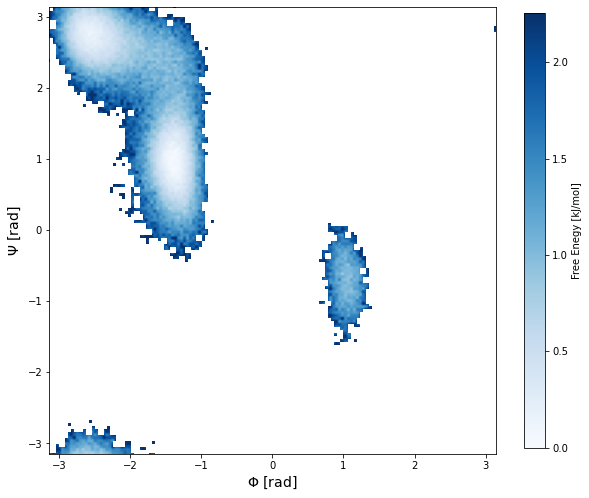

In [45]:
h, bins_x, bins_y = np.histogram2d(x[:,1], x[:,2], bins=150, density=True)
kt = 2.479
beta = 1.0 / kt
f = -beta * np.log(h)
f -= f.min()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = ax.imshow(f.T, extent=[-np.pi, np.pi, -np.pi, np.pi], origin='lower', cmap=plt.cm.Blues)
plt.colorbar(im, label='Free Enegy [kJ/mol]', shrink=0.8)
ax.set_xlabel('$\Phi$ [rad]', size=14)
ax.set_ylabel('$\Psi$ [rad]', size=14)